In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
import seaborn as sns 
import os 
from datetime import datetime 

import warnings 
warnings.filterwarnings("ignore") 


In [3]:
data = pd.read_csv('all_stocks_5yr.csv') 
print(data.shape) 
print(data.sample(7)) 


(619040, 7)
              date    open   high     low   close    volume   Name
402651  2013-10-01  30.860  31.17  30.560  30.830   1035592   NCLH
398258  2015-02-12  54.170  54.54  53.850  54.510   1417646    MYL
298771  2017-05-15  43.250  43.74  43.185  43.730   1887258   INFO
124871  2015-02-02  26.575  26.97  26.225  26.905  36911814  CMCSA
599827  2016-10-19  19.780  20.07  19.780  20.000   2676652     WU
58748   2017-03-14  71.100  71.18  70.690  70.950    871945    APH
385151  2018-01-24  27.410  27.50  27.050  27.200   4884038    MOS


In [4]:
data.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [5]:
data['date'] = pd.to_datetime(data['date']) 
data.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


In [ ]:
data['date'] = pd.to_datetime(data['date']) 
# date vs open 
# date vs close 
plt.figure(figsize=(15, 8)) 
for index, company in enumerate(companies, 1): 
	plt.subplot(3, 3, index) 
	c = data[data['Name'] == company] 
	plt.plot(c['date'], c['close'], c="r", label="close", marker="+") 
	plt.plot(c['date'], c['open'], c="g", label="open", marker="^") 
	plt.title(company) 
	plt.legend() 
	plt.tight_layout() 


In [ ]:
plt.figure(figsize=(15, 8)) 
for index, company in enumerate(companies, 1): 
	plt.subplot(3, 3, index) 
	c = data[data['Name'] == company] 
	plt.plot(c['date'], c['volume'], c='purple', marker='*') 
	plt.title(f"{company} Volume") 
	plt.tight_layout() 


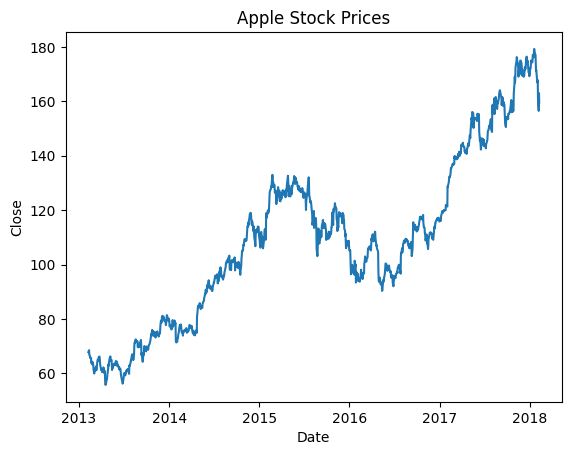

In [8]:
apple = data[data['Name'] == 'AAPL'] 
prediction_range = apple.loc[(apple['date'] > datetime(2013,1,1)) 
& (apple['date']<datetime(2018,1,1))] 
plt.plot(apple['date'],apple['close']) 
plt.xlabel("Date") 
plt.ylabel("Close") 
plt.title("Apple Stock Prices") 
plt.show()


In [9]:
close_data = apple.filter(['close']) 
dataset = close_data.values 
training = int(np.ceil(len(dataset) * .95)) 
print(training) 


1197


In [10]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset) 

train_data = scaled_data[0:int(training), :] 
# prepare feature and labels 
x_train = [] 
y_train = [] 

for i in range(60, len(train_data)): 
	x_train.append(train_data[i-60:i, 0]) 
	y_train.append(train_data[i, 0]) 

x_train, y_train = np.array(x_train), np.array(y_train) 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) 


In [11]:
model = keras.models.Sequential() 
model.add(keras.layers.LSTM(units=64, 
							return_sequences=True, 
							input_shape=(x_train.shape[1], 1))) 
model.add(keras.layers.LSTM(units=64)) 
model.add(keras.layers.Dense(32)) 
model.add(keras.layers.Dropout(0.5)) 
model.add(keras.layers.Dense(1)) 
model.summary 


<bound method Model.summary of <Sequential name=sequential, built=True>>

In [12]:
model.compile(optimizer='adam', 
			loss='mean_squared_error') 
history = model.fit(x_train, 
					y_train, 
					epochs=10) 


Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0767
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0108
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0095
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0089
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0086
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0083
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0069
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0066
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0076
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0067


In [13]:
test_data = scaled_data[training - 60:, :] 
x_test = [] 
y_test = dataset[training:, :] 
for i in range(60, len(test_data)): 
	x_test.append(test_data[i-60:i, 0]) 

x_test = np.array(x_test) 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) 

# predict the testing data 
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions) 

# evaluation metrics 
mse = np.mean(((predictions - y_test) ** 2)) 
print("MSE", mse) 
print("RMSE", np.sqrt(mse)) 


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step
MSE 45.2274728269859
RMSE 6.725137383502727


In [ ]:
train = apple[:training] 
test = apple[training:] 
test['Predictions'] = predictions 

plt.figure(figsize=(10, 8)) 
plt.plot(train['Date'], train['Close']) 
plt.plot(test['Date'], test[['Close', 'Predictions']]) 
plt.title('Apple Stock Close Price') 
plt.xlabel('Date') 
plt.ylabel("Close") 
plt.legend(['Train', 'Test', 'Predictions']) 
